<a href="https://colab.research.google.com/github/y31106891/CQF/blob/master/Module_2_ExamQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A= 423.6149806869816 B= 6.8070207154282985 C= 0.906508930403412 lmda= 0.17774267736771412 lmdb= 3.6294202989022173
cov= [[0.0025  0.0018  0.00255 0.00375]
 [0.0018  0.0144  0.01224 0.018  ]
 [0.00255 0.01224 0.0289  0.0255 ]
 [0.00375 0.018   0.0255  0.0625 ]]
w= [[0.78511066]
 [0.05386419]
 [0.13355472]
 [0.02747042]]
sd= 0.0584009067411041


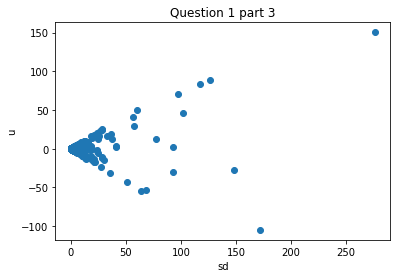

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

u = np.matrix([[0.02],[0.07], [0.15],[0.2]])
vol = np.matrix([[0.05], [0.12], [0.17],[0.25]])
One = np.matrix([[1],[1],[1],[1]])
rho = np.matrix([[1, 0.3,0.3,0.3],
[0.3, 1, 0.6,0.6],
[0.3, 0.6, 1,0.6],
[0.3,0.6,0.6,1]])
m=0.045

rho=rho*1
cov= np.diag(vol.A1).dot(rho).dot(np.diag(vol.A1))

A= One.T.dot(cov.I).dot(One).item()
B=One.T.dot(cov.I).dot(u).item()
C=u.T.dot(cov.I).dot(u).item()

lmda=(C-B*m)/(A*C-B*B)
lmdb=(A*m-B)/(A*C-B*B)

w=lmda*cov.I.dot(One)+lmdb*cov.I.dot(u)
sd=np.sqrt(w.T.dot(cov).dot(w)).item()
print("A=",A,
      "B=",B,
      "C=",C,
      "lmda=",lmda*100,
      "lmdb=",lmdb*100)
print("cov=",cov)
print("w=",w)
print("sd=",sd)

# dot=[]
ul=[]
sdl=[]
for i in range(10000):
  wi=norm.rvs(size=4)
  wi/=wi.sum()
  ui=wi.dot(u).item()
  sdi=np.sqrt(wi.dot(cov).dot(wi.T).item())
  ul.append(ui)
  sdl.append(sdi)

plt.scatter(sdl,ul)
plt.ylabel("u")
plt.xlabel("sd")
plt.title("Question 1 part 3")
plt.show()
